In [1]:
import json
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import json
from pprint import pprint

with open('Grocery_and_Gourmet_Food.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

dataset = pd.DataFrame(data)

In [5]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4.0,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4.0,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5.0,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4.0,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


In [6]:
dataset.shape

(5074160, 12)

A small examplanion for each column:
- overall - rating of the product
- verified - verified 
- reviewTime - time of the review (raw)
- reviewerID - ID of the reviewer
- asin - ID of the product
- reviewerName - name of the reviewer
- reviewText - text of the review
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- vote - helpful votes of the review (number of votes saying that review is useful)
- image - image of the product
- style - a disctionary of the product metadata



**Lets fix the format of the reviewTime, Overall and Verified columns**

In [7]:
def format_dataset(dataset):
    dataset["overall"] = dataset["overall"].astype(int)
    dataset["verified"] = dataset["verified"].astype(bool)

    
    # Cast reviewTime to date
    dataset["reviewTime"] = dataset["reviewTime"].str.replace("^0", "")
    dataset["reviewTime"] = pd.to_datetime(dataset["reviewTime"], format="%m %d, %Y")

In [8]:
#fix the format
format_dataset(dataset)
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5,True,2013-06-04,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4,True,2014-05-23,A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4,True,2014-05-09,A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5,True,2014-04-20,A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4,True,2014-04-16,A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


# Data Analysis

In [9]:
##extract year and month
dataset['reviewYear'] = dataset['reviewTime'].map(lambda x: x.strftime('%Y'))
dataset['reviewMonth'] = dataset['reviewTime'].map(lambda x: x.strftime('%m'))
dataset['reviewMonth']=dataset["reviewMonth"].astype(int)

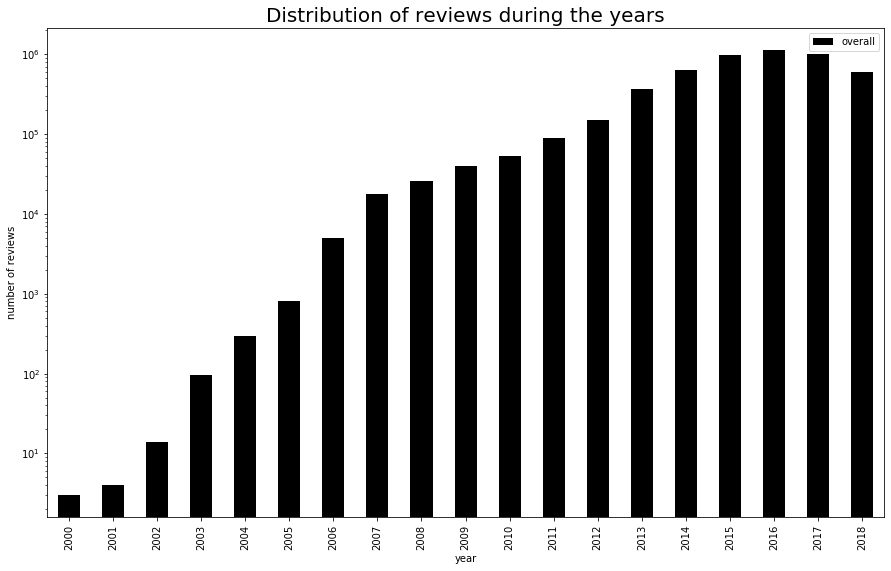

In [10]:
##plot how many reviews we have for each year
d = dataset[['overall','reviewYear']].copy()
groupby_year = d.groupby('reviewYear').count()

color = plt.cm.copper(np.linspace(0, 100, 150))
groupby_year.sort_values(by=['reviewYear']).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of reviews during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.show()

**During the years more and more people tend to buy foods from amazon and put there review. Let's do the same during the months**

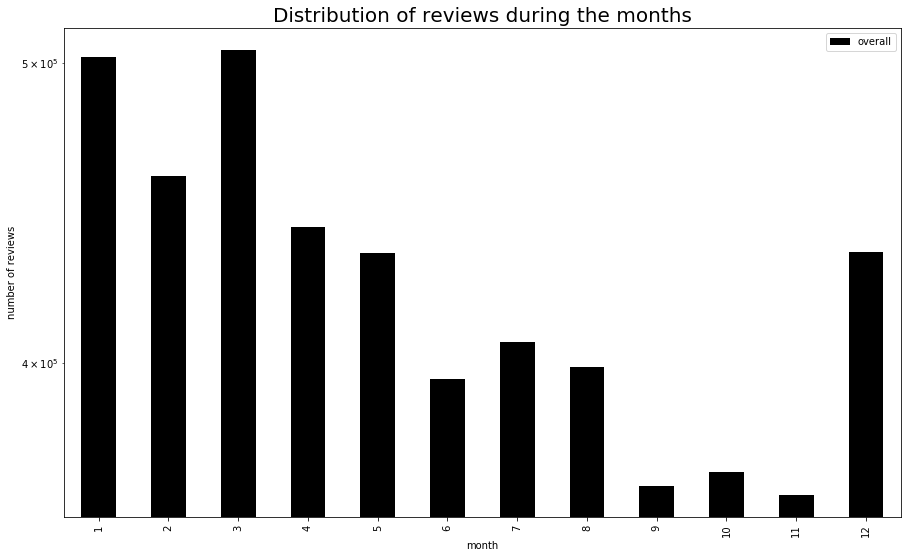

In [11]:
##plot how many reviews we have for each year
d = dataset[['overall','reviewMonth']].copy()
groupby_year = d.groupby('reviewMonth').count()

color = plt.cm.copper(np.linspace(0, 100, 150))
groupby_year.sort_values(by=['reviewMonth']).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of reviews during the months', fontsize = 20)
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.show()

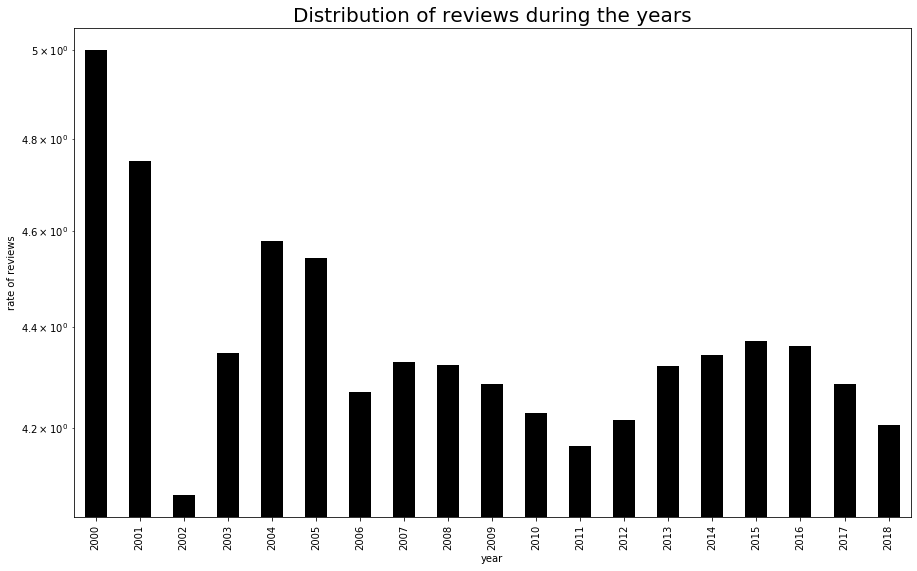

In [12]:
##make the plot for the distribution of the price
d = dataset[['overall','reviewYear']].copy()
d = d.groupby('reviewYear')['overall'].mean()
d.plot.bar(color="black",figsize = (15, 9))
plt.title('Distribution of reviews during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('rate of reviews')
plt.yscale("log")
plt.show()

**As we can see from the avobe plot users tend to by things during 12 and 1 which is a christmas period. Also they tend to buy product mostly during 3 and 4 which is a easter period.**
<br>
**We will try to go deeper to see what kind of food we bought and if it relevant with google trends**

##  Healthy Food and Sweets Analysis 

**first we used the google trends as a guideline to make the basic vectors and after we used word2vector to make vector with more words**

In [99]:
##keep only the rows which dont have Nan values at summary and reviewText
d=dataset[dataset["summary"].notnull() | dataset["reviewText"].notnull()]

##the list of healthy vs sweets words
healthy_food=["vegetarianism","veganism","organic","healthy","vegan","broccoli","workout","fruit","avocado","fish","salad"]
sweets=["sweet","chocolate","cake","pancakes","cheesacake","Wafers","cookies","brownies","cupcak","buttercream"]
junk_food=["junk","chips","unhealthi","pizza","fried","burger","hamburg"]

In [100]:
##new dataframe which contains only the trends words
healthy_data=d[d["summary"].str.lower().str.contains('|'.join(healthy_food)) | d["reviewText"].str.lower().str.contains('|'.join(healthy_food))]
sweets_data=d[d["summary"].str.lower().str.contains('|'.join(sweets)) | d["reviewText"].str.lower().str.contains('|'.join(sweets))]
junk=d[d["summary"].str.lower().str.contains('|'.join(junk_food)) | d["reviewText"].str.lower().str.contains('|'.join(junk_food))]
print("healthy food: ",healthy_data.shape[0])
print("Sweets: ",sweets_data.shape[0])
print("junk:",junk.shape[0])

healthy food:  370924
Sweets:  586730
junk: 93861


**lets go deeper during the years and months**

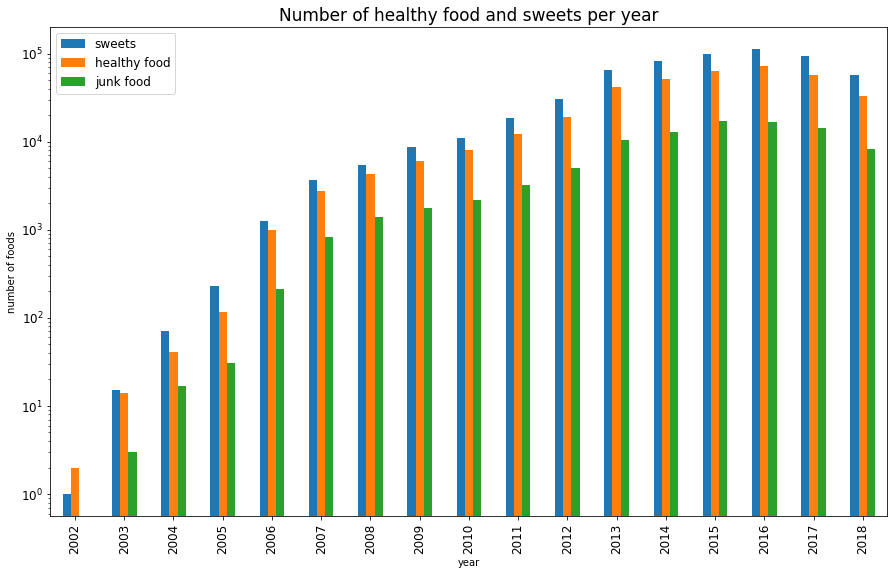

In [101]:

sweets_over_time = sweets_data.groupby('reviewYear').size()
healthy_over_time = healthy_data.groupby('reviewYear').size()
junk_over_time = junk.groupby('reviewYear').size()


data_year = pd.DataFrame(sweets_over_time, columns=['sweets'])
data_year['healthy food'] = pd.Series(healthy_over_time)
data_year['junk food'] = pd.Series(junk_over_time)

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of foods')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of healthy food and sweets per year', fontsize=17)

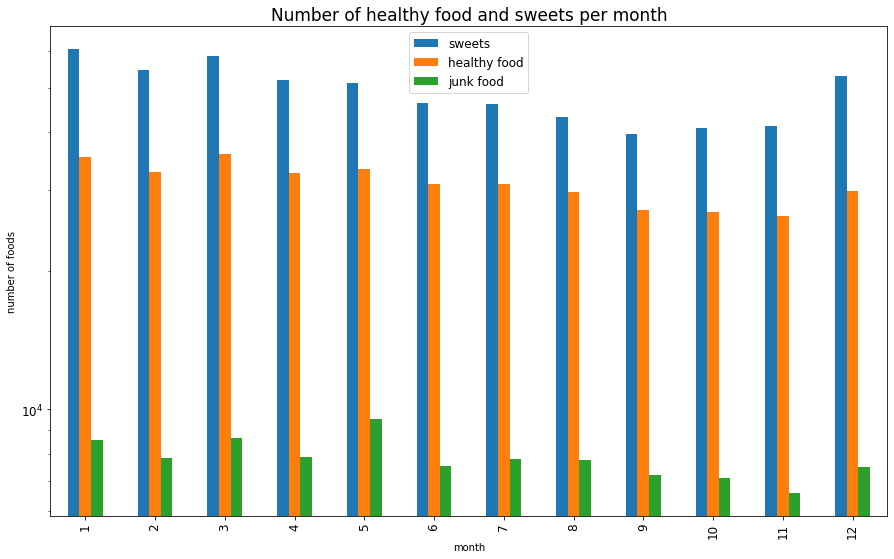

In [104]:
sweets_over_time = sweets_data.groupby('reviewMonth').size()
healthy_over_time = healthy_data.groupby('reviewMonth').size()
junk_over_time = junk.groupby('reviewMonth').size()


data_month = pd.DataFrame(sweets_over_time, columns=['sweets'])
data_month['healthy food'] = pd.Series(healthy_over_time)
data_month['junk food'] = pd.Series(junk_over_time)


data_month.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of foods')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of healthy food and sweets per month', fontsize=17)

## Drinks vs Food Analysis

In [90]:
##the list of drinks and foods
drinks=["tea","coffe","drink","alcohol","lipton","starbucks","milk"]
food=["beef","pasta","hamburg","fish","food","salad","steak","grill"]

In [91]:
##new dataframe which contains only the trends words
drinks_data=d[d["summary"].str.lower().str.contains('|'.join(drinks)) | d["reviewText"].str.lower().str.contains('|'.join(drinks))]
food_data=d[d["summary"].str.lower().str.contains('|'.join(food)) | d["reviewText"].str.lower().str.contains('|'.join(food))]
print("drinks_data: ",drinks_data.shape[0])
print("food_data: ",food_data.shape[0])

drinks_data:  1068972
food_data:  287383


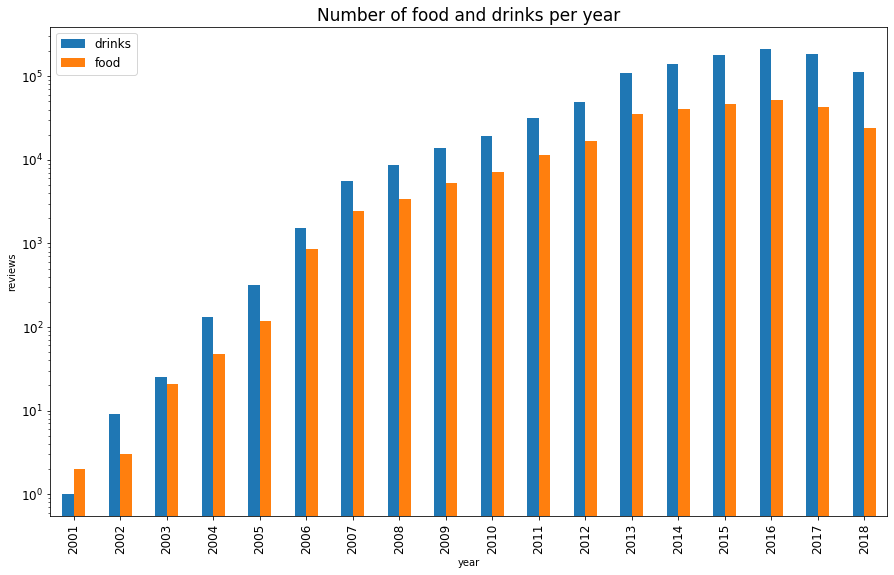

In [92]:
drinks_over_time = drinks_data.groupby('reviewYear').size()
food_over_time = food_data.groupby('reviewYear').size()


data_year = pd.DataFrame(drinks_over_time, columns=['drinks'])
data_year['food'] = pd.Series(food_over_time)

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of food and drinks per year', fontsize=17)

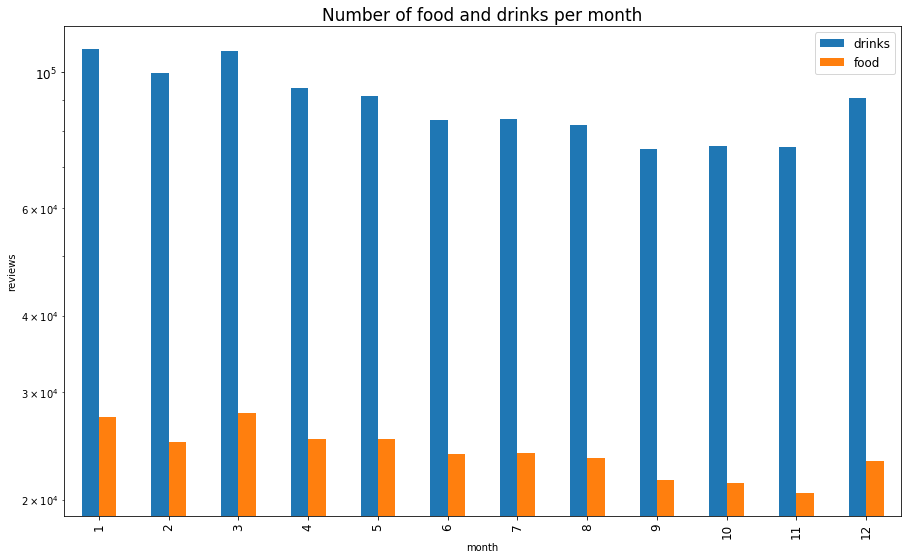

In [93]:
drinks_over_time = drinks_data.groupby('reviewMonth').size()
food_over_time = food_data.groupby('reviewMonth').size()


data_year = pd.DataFrame(drinks_over_time, columns=['drinks'])
data_year['food'] = pd.Series(food_over_time)

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of food and drinks per month', fontsize=17)

**The food incresing during the 12,1 and 3 months which are christmas and easter holidays, these periods people tend to buy more food.**

## holidays - Celebrations

**We will check the following holidays-celebrations:**
- summer 
- easter 
- Chistmas 
- halloween 
- black friday 
- birthday 
- anniversary 
- valentines day 
- wedding 
- thanksgiving 

In [22]:
##the list of holidays words
holidays=["summer","easter","chistmas","halloween","black friday","birthday","anniversary","valentines day","wedding", "thanksgiving"]

In [23]:
##lets focus on the trends list and check exactly how many rows have each of the trend
for i in holidays:
    print(i,d[d["summary"].str.lower().str.contains(str(i)) | d["reviewText"].str.lower().str.contains(str(i))].shape[0])

summer 19223
easter 7940
chistmas 30
halloween 6831
black friday 105
birthday 29026
anniversary 1553
valentines day 1479
wedding 11800
thanksgiving 3579


**Lets focus more on the birthday, summer, easter, anniversary, wedding during the years and months**

In [24]:
summer = d[d["summary"].str.lower().str.contains(str("summer")) | d["reviewText"].str.lower().str.contains(str("summer"))]
easter = d[d["summary"].str.lower().str.contains(str("easter")) | d["reviewText"].str.lower().str.contains(str("easter"))]
anniversary = d[d["summary"].str.contains(str("anniversary")) | d["reviewText"].str.lower().str.contains(str("anniversary"))]
wedding = d[d["summary"].str.lower().str.contains(str("wedding")) | d["reviewText"].str.lower().str.contains(str("wedding"))]

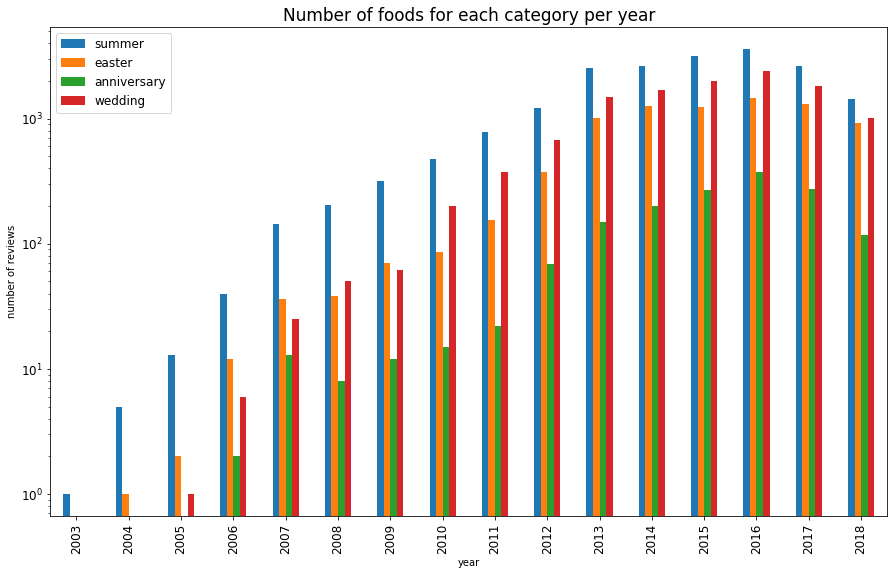

In [25]:
summer_over_time = summer.groupby('reviewYear').size()
easter_over_time = easter.groupby('reviewYear').size()
anniversary_over_time = anniversary.groupby('reviewYear').size()
wedding_over_time = wedding.groupby('reviewYear').size()


data_year = pd.DataFrame(summer_over_time, columns=['summer'])
data_year['easter'] = pd.Series(easter_over_time)
data_year['anniversary'] = pd.Series(anniversary_over_time)
data_year['wedding'] = pd.Series(wedding_over_time)


data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of foods for each category per year', fontsize=17)

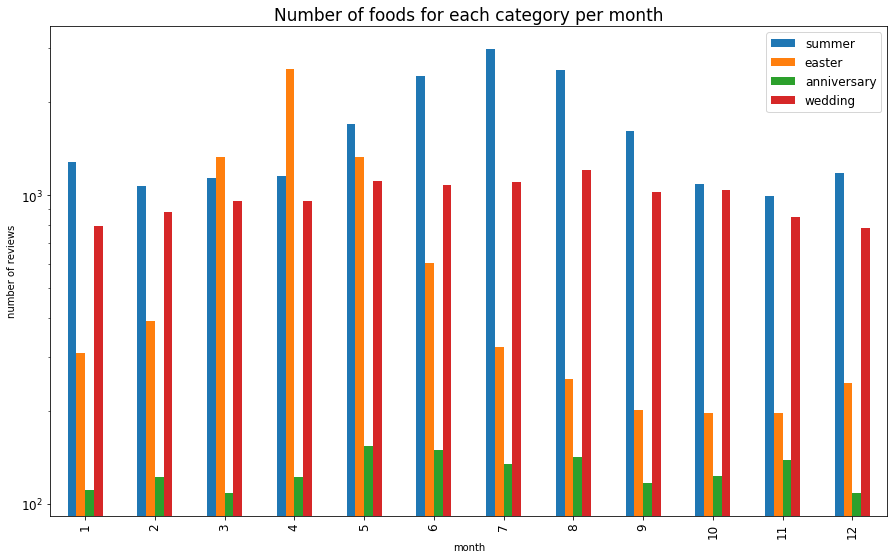

In [26]:
summer_over_time = summer.groupby('reviewMonth').size()
easter_over_time = easter.groupby('reviewMonth').size()
anniversary_over_time = anniversary.groupby('reviewMonth').size()
wedding_over_time = wedding.groupby('reviewMonth').size()


data_month = pd.DataFrame(summer_over_time, columns=['summer'])
data_month['easter'] = pd.Series(easter_over_time)
data_month['anniversary'] = pd.Series(anniversary_over_time)
data_month['wedding'] = pd.Series(wedding_over_time)


data_month.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of foods for each category per month', fontsize=17)

**As we can observe from the above diagram during people tend to by summer product during the 5-9 months with peak 7 (= july). Also for the weending and anniversary products tend to by them constantly. It seems to have constant function.** 
<br>
**Lets focus the overall distribution for each year of each category**

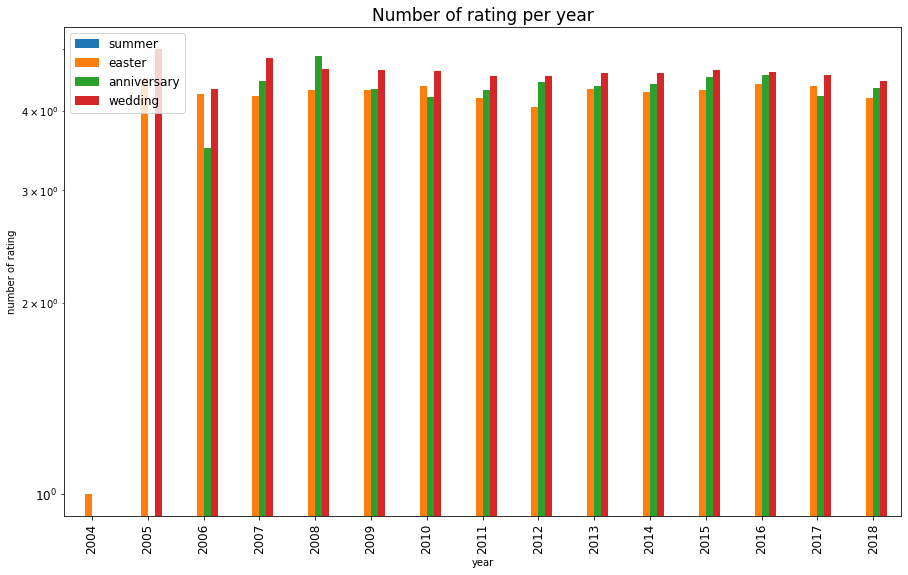

In [28]:
summer_over_time = summer.groupby('reviewYear')['overall'].mean()
easter_over_time = easter.groupby('reviewYear')['overall'].mean()
anniversary_over_time = anniversary.groupby('reviewYear')['overall'].mean()
wedding_over_time = wedding.groupby('reviewYear')['overall'].mean()


data_year = pd.DataFrame(summer_over_time, columns=['summer'])
data_year['easter'] = pd.Series(easter_over_time)
data_year['anniversary'] = pd.Series(anniversary_over_time)
data_year['wedding'] = pd.Series(wedding_over_time)


data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of rating')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of rating per year', fontsize=17)

## Offer and discount value

**In this step we will check how ofter people tend to buy foods with offer or discount values during the years and months**

In [147]:
##the list of offers words
offers=["offer","discount","cheap","free food","coupon","sale","outlet"]

In [148]:
##lets focus on the offers list and check exactly how many rows have each of the trend
for i in offers:
    print(i,d[d["summary"].str.lower().str.contains(str(i)) | d["reviewText"].str.lower().str.contains(str(i))].shape[0])

offer 33100
discount 12110
cheap 84889
free food 1418
coupon 4044
sale 19823
outlet 1117


In [149]:
##new dataframe which contains only the trends words
offer_price=d[d["summary"].str.lower().str.contains('|'.join(offers)) | d["reviewText"].str.lower().str.contains('|'.join(offers))]

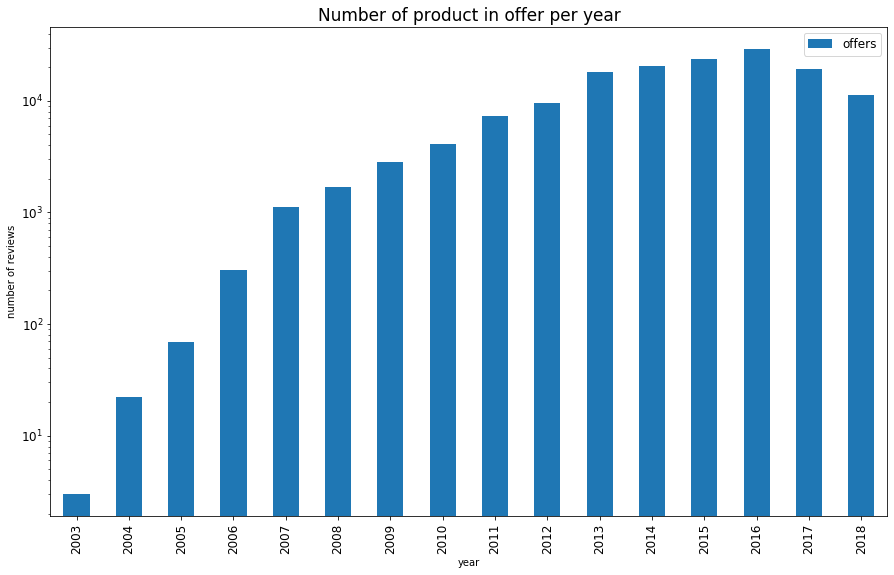

In [150]:
offer_over_time = offer_price.groupby('reviewYear').size()

data_year = pd.DataFrame(offer_over_time, columns=['offers'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of product in offer per year', fontsize=17)

**As we can observe from the above diagram people tend to products in the offer/discount price. Lets analasis that during the months and after this lets go deeper in that phenomeno using overall column(=rating of the product)**

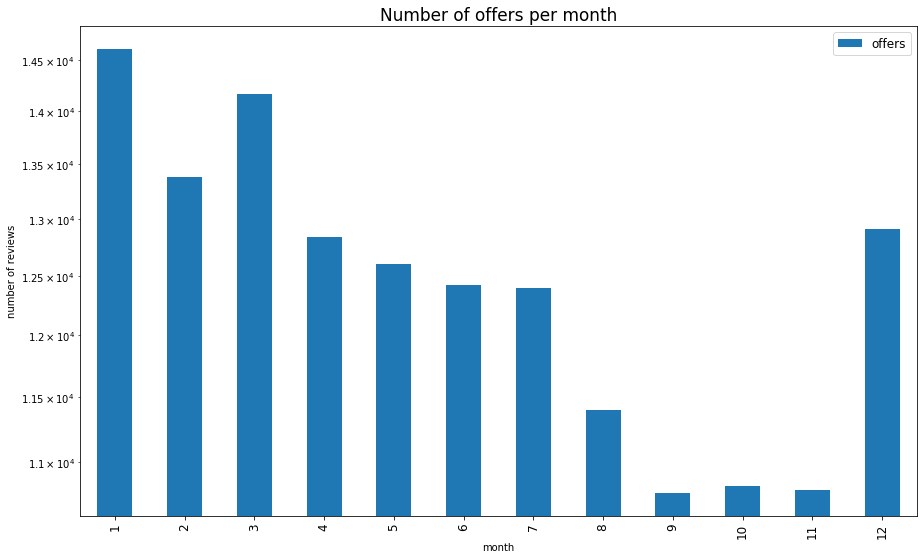

In [151]:
offer_over_time = offer_price.groupby('reviewMonth').size()


data_year = pd.DataFrame(offer_over_time, columns=['offers'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of offers per month', fontsize=17)

### analyze this using overall column

**People tend to buy product in offer price *but* are they happy for that product? Do product have a good quality or product in offer price means bad evaluation?**

In [152]:
offer_over_time = offer_price.groupby('reviewYear')['overall'].mean()

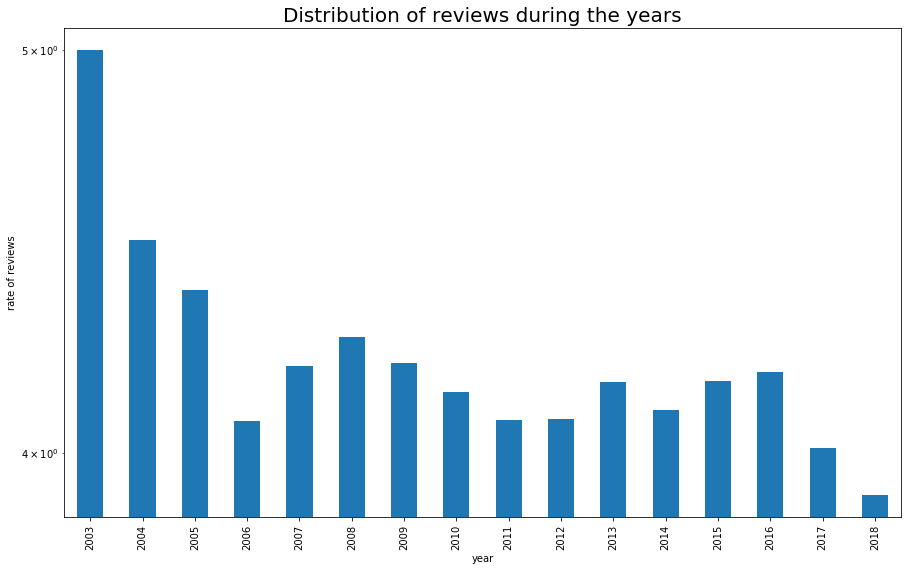

In [153]:
offer_over_time.plot.bar(figsize = (15, 9))
plt.title('Distribution of reviews during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('rate of reviews')
plt.yscale("log")
plt.show()

## Prime Category

**Amazon has category for the users who buy things. Amazon Prime is a paid subscription service offered by Amazon**

In [175]:
prime=["prime","subscript","membership","subscrib"]
prime=d[d["summary"].str.lower().str.contains('|'.join(prime)) | d["reviewText"].str.lower().str.contains('|'.join(prime))]

In [176]:
prime.shape[0]

52203

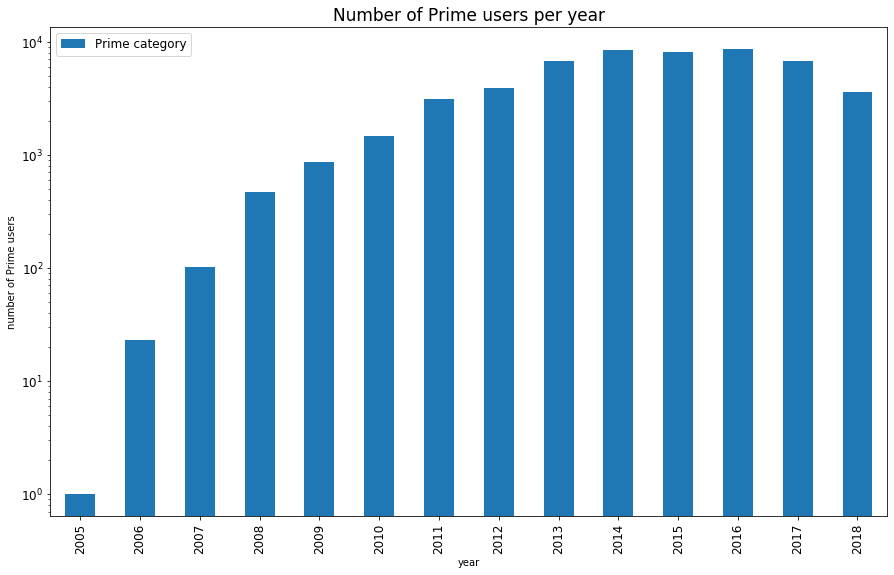

In [177]:
prime_over_time = prime.groupby('reviewYear').size()


data_year = pd.DataFrame(prime_over_time, columns=['Prime category'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of Prime users')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of Prime users per year', fontsize=17)

**As we can see from the above plot the number of Prime buyers inceasing over the year. Let go deeper our analysis using the overall column which contains the rating of the product to see if the Prime users are happy this that category.**

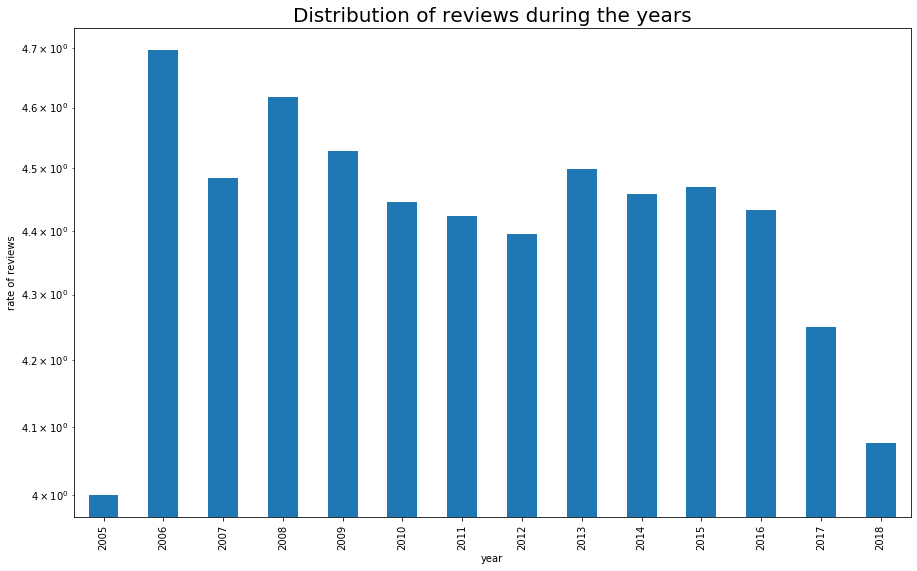

In [178]:
prime_over_time = prime.groupby('reviewYear')['overall'].mean()
prime_over_time.plot.bar(figsize = (15, 9))
plt.title('Distribution of reviews during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('rate of reviews')
plt.yscale("log")
plt.show()

## Energy food and Drinks

ref: https://www.thinkwithgoogle.com/consumer-insights/2016-food-trends-google/

In [44]:
energy=d[d["summary"].str.lower().str.contains(str("energy")) | d["reviewText"].str.lower().str.contains(str("energy"))]

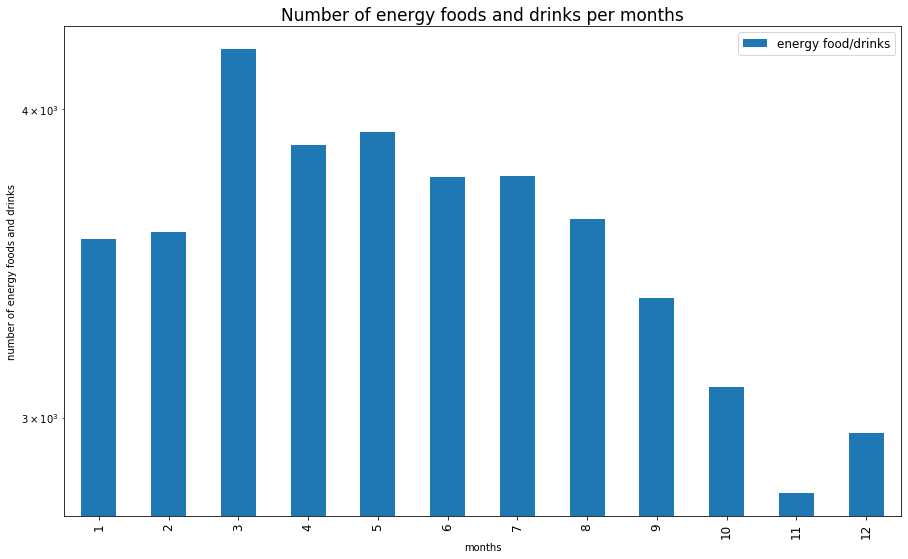

In [46]:
energy_over_time = energy.groupby('reviewMonth').size()


data_year = pd.DataFrame(energy_over_time, columns=['energy food/drinks'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('months')
plt.ylabel('number of energy foods and drinks')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of energy foods and drinks per months', fontsize=17)

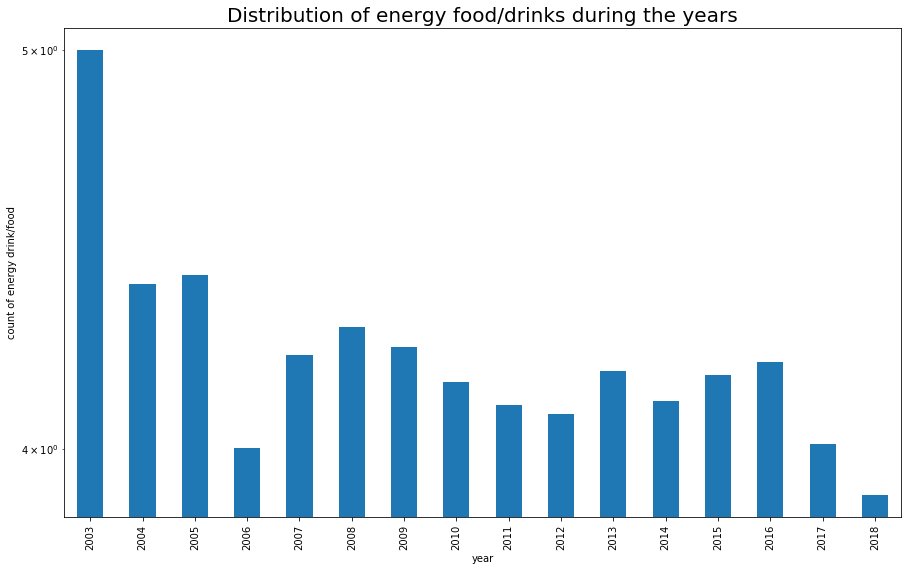

In [71]:
energy_over_time = energy.groupby('reviewYear')['overall'].mean()
offer_over_time.plot.bar(figsize = (15, 9))
plt.title('Distribution of energy food/drinks during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('grade of energy drink/food')
plt.yscale("log")
plt.show()

## ethnic food

**Using Amazon people have the opportunity to taste food from other countries. Let's see how often people tend to buy ethnic food and if they are satisfied using these products**

In [157]:
ethnic_food=["chines","japanes","mexican","korean","indian","ethnic","asian","persian","thai","traditional"]
ethnic=d[d["summary"].str.lower().str.contains('|'.join(ethnic_food)) | d["reviewText"].str.lower().str.contains('|'.join(ethnic_food))]

In [158]:
ethnic.shape[0]

67522

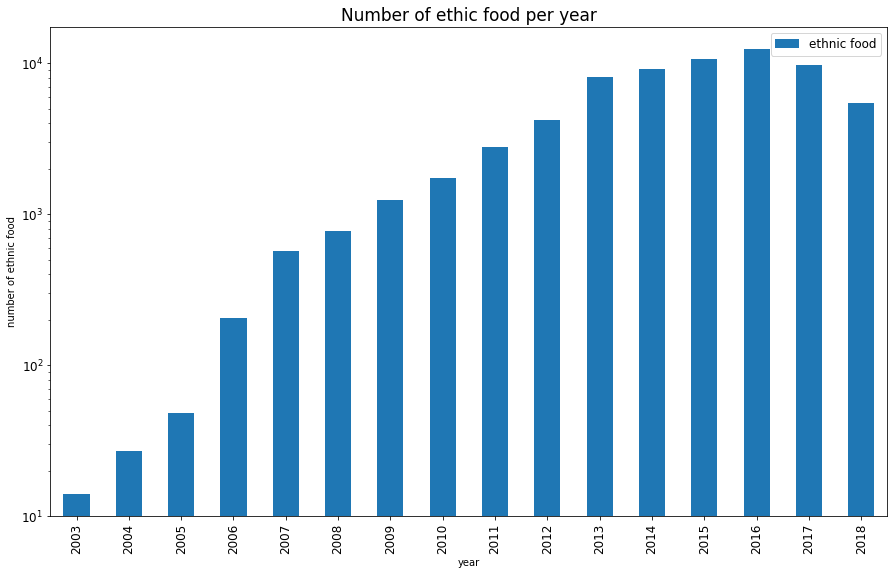

In [160]:
ethnic_over_time = ethnic.groupby('reviewYear').size()


data_year = pd.DataFrame(ethnic_over_time, columns=['ethnic food'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('year')
plt.ylabel('number of ethnic food')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of ethic food per year', fontsize=17)

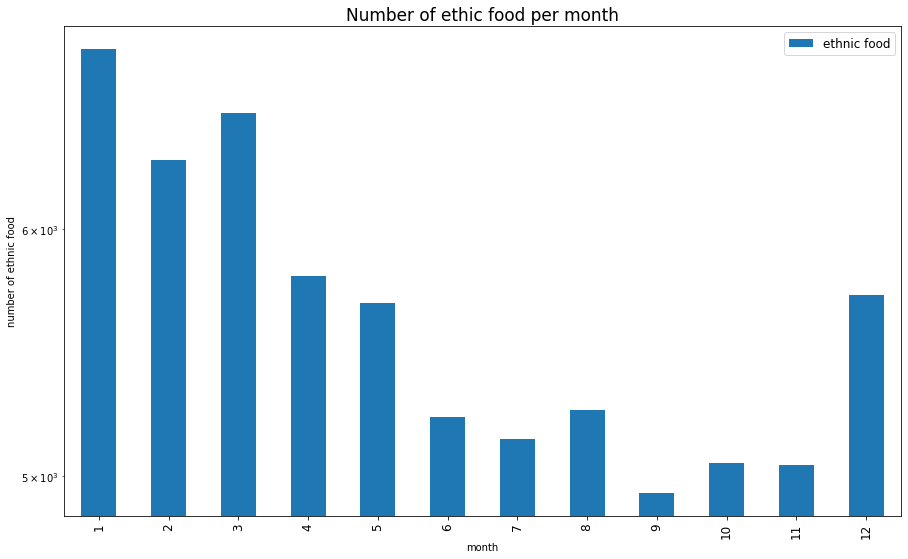

In [161]:
ethnic_over_time = ethnic.groupby('reviewMonth').size()


data_year = pd.DataFrame(ethnic_over_time, columns=['ethnic food'])

data_year.plot.bar(figsize=(15, 9))
plt.xlabel('month')
plt.ylabel('number of ethnic food')
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
_ = plt.title('Number of ethic food per month', fontsize=17)

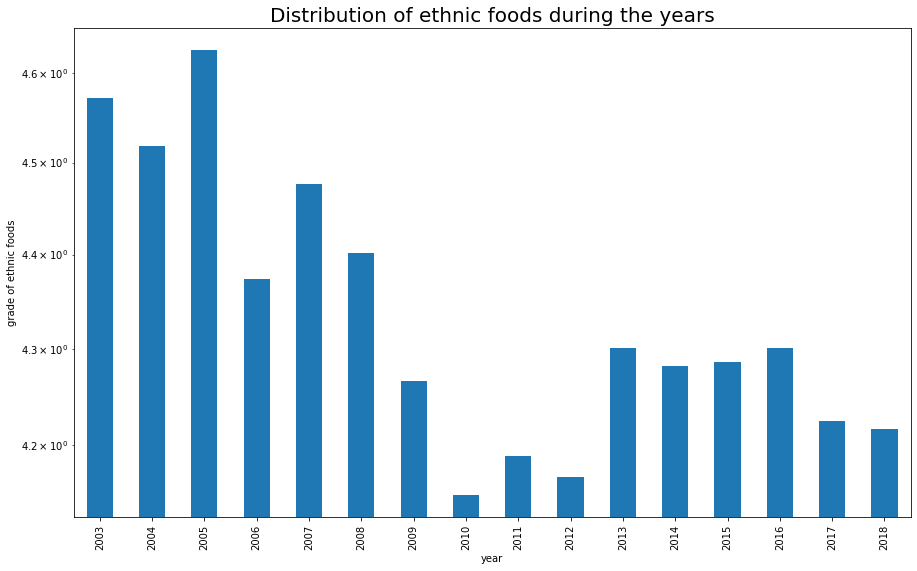

In [162]:
ethnic_over_time = ethnic.groupby('reviewYear')['overall'].mean()
ethnic_over_time.plot.bar(figsize = (15, 9))
plt.title('Distribution of ethnic foods during the years', fontsize = 20)
plt.xlabel('year')
plt.ylabel('grade of ethnic foods')
plt.yscale("log")
plt.show()

## Word2Vect

In [17]:
## food vs drinks

## healthy food vs sweets

## 

In [18]:
import multiprocessing

from gensim.models import Word2Vec



In [19]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
texts = []
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [54]:
summary=d["summary"].to_list()
reviewText=d["reviewText"].to_list()

doc_set = summary[:10000] + reviewText[:100000]

In [55]:
for i in doc_set:
    
    # clean and tokenize document string
    raw = str(i).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

In [56]:
texts

[['love'],
 ['nice', 'small'],
 ['s', 'look', 'like', '5', 'kina'],
 ['recommend', 'friend'],
 ['topper'],
 ['ship', 'disast'],
 ['great', 'qualiti', 'product', 'never', 'satisfi'],
 ['great', 'buy'],
 ['pretti'],
 ['perfect'],
 ['pretti'],
 ['five', 'star'],
 ['wonder', 'tea', 'great', 'price'],
 ['best', 'black', 'tea', 'us'],
 ['five', 'star'],
 ['great', 'tea', 'flavor'],
 [],
 ['yellow', 'label', 'lipton', 'tea'],
 ['great', 'tea'],
 ['best', 'black', 'tea'],
 ['tea', 'will', 'drink'],
 ['good', 'stuff', 'tea', 'rememb', '50', '60', 'year'],
 ['one', 'star'],
 ['five', 'star'],
 ['best', 'tea', 'ever', 'noth', 'like', 'american', 'lipton', 'tea'],
 ['great', 'product'],
 ['best', 'lipton', 'tea', 'now', 'avail', 'state'],
 ['one', 'star'],
 ['wonder', 'full', 'bodi', 'black', 'tea', 'make', 'perfect', 'cup', 'everi'],
 ['great', 'tea', 'milk', 'sugar'],
 ['love', 'tea'],
 ['yum'],
 ['five', 'star'],
 ['five', 'star'],
 ['tealici'],
 ['strong'],
 ['wow', 'outstand'],
 ['one', 'star

In [57]:
 #model = Word2Vec(texts, size=100, window=5, min_count=5, workers=2)

In [58]:
word2vec = Word2Vec(texts,size=100, window=5, min_count=2)

In [59]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'love': <gensim.models.keyedvectors.Vocab object at 0x7f37f75655c0>, 'nice': <gensim.models.keyedvectors.Vocab object at 0x7f37f75652e8>, 'small': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565518>, 's': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565668>, 'look': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565828>, 'like': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565908>, '5': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565a90>, 'kina': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565b00>, 'recommend': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565898>, 'friend': <gensim.models.keyedvectors.Vocab object at 0x7f37f75656d8>, 'topper': <gensim.models.keyedvectors.Vocab object at 0x7f37f75658d0>, 'ship': <gensim.models.keyedvectors.Vocab object at 0x7f37f75655f8>, 'disast': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565ac8>, 'great': <gensim.models.keyedvectors.Vocab object at 0x7f37f7565b70>, 'qualiti': <gensim.models.

In [153]:
sim_words = word2vec.wv.most_similar('traditional')

KeyError: "word 'traditional' not in vocabulary"

In [154]:
sim_words

[('indian', 0.7146729826927185),
 ('panang', 0.6734222173690796),
 ('masaman', 0.6375881433486938),
 ('mae', 0.6375353336334229),
 ('pho', 0.6368089318275452),
 ('asian', 0.6200358867645264),
 ('curri', 0.6152206659317017),
 ('japanes', 0.6105396151542664),
 ('mexican', 0.6048070788383484),
 ('ploy', 0.6010406017303467)]

In [ ]:
##ref: https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/

In [145]:
##keep only the rows which dont have Nan values at summary and reviewText
d=dataset[dataset["summary"].notnull() | dataset["reviewText"].notnull()]

sauce=["ketchup","mayo","hellman","heinz","tabasco","sauce","curry"]


In [146]:
d[d["summary"].str.lower().str.contains(str("traditional")) | d["reviewText"].str.lower().str.contains(str("traditional"))].shape[0]


15604

In [147]:
c=d[d["summary"].str.lower().str.contains(str("traditional")) | d["reviewText"].str.lower().str.contains(str("traditional"))]

In [148]:
c.shape[0]

15604

In [151]:
s=c["reviewText"].iloc[2]

In [152]:
s

"So much better than any other pre-made curry paste I've used before. With the addition of a few traditional ingredients, I'm able to make curries comparable to my favorite restaurant's. I also love how spicy it is!"